In [2]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, accuracy_score


In [4]:
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)


In [6]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


In [8]:

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
y_train = y_train.flatten()
y_test  = y_test.flatten()

X = np.concatenate([x_train, x_test], axis=0)
y = np.concatenate([y_train, y_test], axis=0)

# First split: 70% train, 30% temp (val+test)
X_train, X_temp, y_train_s, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=SEED, stratify=y
)

# Second split: split the 30% into 15% val and 15% test -> 50/50 of temp
X_val, X_test, y_val, y_test_s = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=SEED, stratify=y_temp
)


print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", X_test.shape)
y_train, y_val, y_test = y_train_s, y_val, y_test_s


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 249s 1us/step
Train: (42000, 32, 32, 3) Val: (9000, 32, 32, 3) Test: (9000, 32, 32, 3)


In [10]:
X_train = X_train.astype("float32") / 255.0
X_val   = X_val.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

num_classes = 10
class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
input_shape = X_train.shape[1:]
input_shape, num_classes


((32, 32, 3), 10)

In [12]:
def make_model(input_shape=(32,32,3), num_classes=10, dropout_rate=0.25):
    model = keras.Sequential([
        layers.Input(shape=input_shape),

        # Block 1
        layers.Conv2D(32, (3,3), padding="same"),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.Conv2D(32, (3,3), padding="same"),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D(),
        layers.Dropout(dropout_rate),

        # Block 2
        layers.Conv2D(64, (3,3), padding="same"),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.Conv2D(64, (3,3), padding="same"),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D(),
        layers.Dropout(dropout_rate),

        # Block 3
        layers.Conv2D(128, (3,3), padding="same"),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.Conv2D(128, (3,3), padding="same"),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D(),
        layers.Dropout(dropout_rate),

        layers.Flatten(),
        layers.Dense(256),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax")
    ])
    return model

model = make_model(input_shape, num_classes)
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 8, 8, 128)      │             

 Total params: 816,938 (3.12 MB)

 Trainable params: 815,530 (3.11 MB)

 Non-trainable params: 1,408 (5.50 KB)

## use early stopping and call back function


In [14]:
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=2,
    verbose=1
)


## Train the model


In [16]:
BATCH_SIZE = 64
EPOCHS = 30

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)


Epoch 1/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 123s 183ms/step - accuracy: 0.3587 - loss: 1.8463 - val_accuracy: 0.4801 - val_loss: 1.5943 - learning_rate: 0.0010
Epoch 2/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 113s 173ms/step - accuracy: 0.6067 - loss: 1.1090 - val_accuracy: 0.6408 - val_loss: 1.0063 - learning_rate: 0.0010
Epoch 3/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 114s 174ms/step - accuracy: 0.6817 - loss: 0.9065 - val_accuracy: 0.6700 - val_loss: 0.9505 - learning_rate: 0.0010
Epoch 4/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 114s 174ms/step - accuracy: 0.7209 - loss: 0.8023 - val_accuracy: 0.7278 - val_loss: 0.7972 - learning_rate: 0.0010
Epoch 5/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 116s 176ms/step - accuracy: 0.7455 - loss: 0.7324 - val_accuracy: 0.7468 - val_loss: 0.7222 - learning_rate: 0.0010
Epoch 6/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 112s 170ms/step - accuracy: 0.7654 - loss: 0.6692 - val_accuracy: 0.7652 - val_loss: 0.6820 - learning_rate: 0.0010
Epoch 7/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 113s 172ms/step - accura

## 6) Plot training vs. validation curves


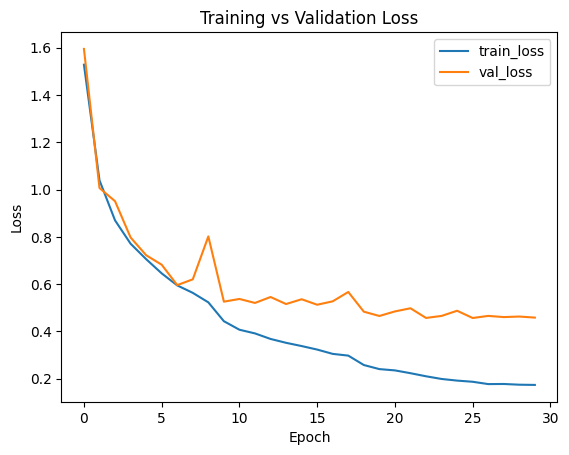

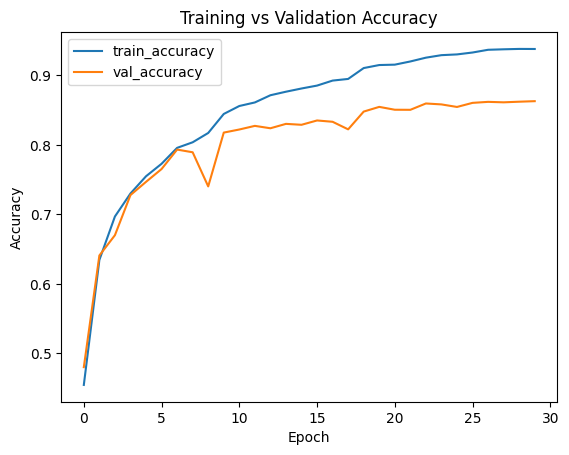

In [18]:

def plot_history(h, key):
    plt.figure()
    plt.plot(h.history[key], label=f"train_{key}")
    plt.plot(h.history[f"val_{key}"], label=f"val_{key}")
    plt.xlabel("Epoch")
    plt.ylabel(key.capitalize())
    plt.legend()
    plt.title(f"Training vs Validation {key.capitalize()}")
    plt.show()

plot_history(history, "loss")
plot_history(history, "accuracy")


## Evaluate: Accuracy, Precision, Recall, F1 on Val & Test


In [20]:
def evaluate_split(X, y, name="Split"):
    probs = model.predict(X, verbose=0)
    y_pred = np.argmax(probs, axis=1)

    acc = accuracy_score(y, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y, y_pred, average="macro", zero_division=0)

    print(f"{name} Accuracy : {acc:.4f}")
    print(f"{name} Precision: {prec:.4f}")
    print(f"{name} Recall   : {rec:.4f}")
    print(f"{name} F1-Score : {f1:.4f}")
    print("\nClassification Report (macro avg at bottom):\n")
    print(classification_report(y, y_pred, target_names=class_names, zero_division=0))

    return y_pred

print("Validation Metrics")
val_pred = evaluate_split(X_val, y_val, name="Validation")

print("\nTest Metrics")
test_pred = evaluate_split(X_test, y_test, name="Test")


Validation Metrics
Validation Accuracy : 0.8604
Validation Precision: 0.8610
Validation Recall   : 0.8604
Validation F1-Score : 0.8595

Classification Report (macro avg at bottom):

              precision    recall  f1-score   support

    airplane       0.89      0.88      0.89       900
  automobile       0.94      0.93      0.93       900
        bird       0.85      0.75      0.80       900
         cat       0.79      0.67      0.73       900
        deer       0.83      0.85      0.84       900
         dog       0.74      0.85      0.80       900
        frog       0.86      0.91      0.89       900
       horse       0.88      0.89      0.88       900
        ship       0.93      0.92      0.92       900
       truck       0.91      0.94      0.92       900

    accuracy                           0.86      9000
   macro avg       0.86      0.86      0.86      9000
weighted avg       0.86      0.86      0.86      9000


Test Metrics
Test Accuracy : 0.8686
Test Precision: 0.8688

## Confusion Matrix


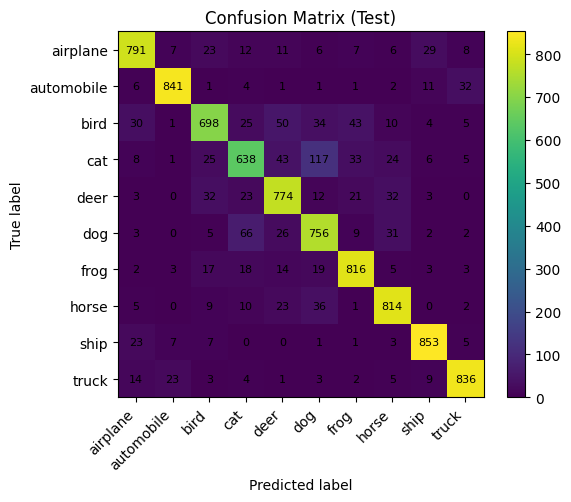

In [25]:
cm = confusion_matrix(y_test, test_pred, labels=list(range(num_classes)))

plt.figure(figsize=(6,5))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix (Test)")
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, class_names, rotation=45, ha="right")
plt.yticks(tick_marks, class_names)
# add counts
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center", fontsize=8)
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.tight_layout()
plt.show()


##  Visualize some predictions


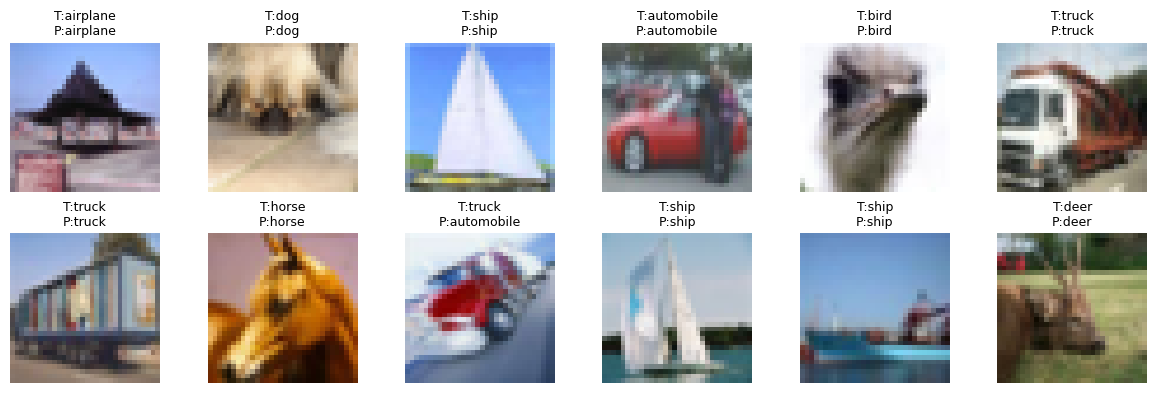

In [27]:
def show_samples(X, y_true, y_pred, n=12):
    idxs = np.random.choice(len(X), size=n, replace=False)
    plt.figure(figsize=(12,4))
    for i, idx in enumerate(idxs, 1):
        plt.subplot(2, n//2, i)
        plt.imshow(X[idx])
        t = class_names[y_true[idx]]
        p = class_names[y_pred[idx]]
        title = f"T:{t}\nP:{p}"
        plt.title(title, fontsize=9)
        plt.axis("off")
    plt.tight_layout()
    plt.show()


show_samples(X_test, y_test, test_pred, n=12)


## Save model 


In [29]:
os.makedirs("models", exist_ok=True)
model_path = os.path.join("models", "cifar10_cnn.h5")
model.save(model_path)
print("Saved model to:", model_path)

import json
with open(os.path.join("models", "class_names.json"), "w") as f:
    json.dump(class_names, f)
print("Saved class names.")


Saved model to: models/cifar10_cnn.h5
Saved class names.
